In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

In [ ]:
#Q1
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff
    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val
    def bestfitpoly(self,points,deg):
      A=[[0 for i in range(deg+1)] for j in range(deg+1)]
      B=[0 for i in range(deg+1)]
      for i in range(deg+1):
        for j in range(deg+1):
          A[i][j]=sum([x[0]**(i+j) for x in points])
        B[i]=sum([x[1]*(x[0]**i) for x in points])
      x=np.linalg.solve(A,B)
      p=Polynomial(x)
      x_points=[x[0] for x in points]
      y_points=[x[1] for x in points]
      x_new=np.linspace(min(x_points),max(x_points),200)
      xaxis=[]
      yaxis=[]
      for x in x_new:
        xaxis.append(x)
        yaxis.append(p[x])
      plt.plot(xaxis,yaxis,label="Polynomial Fit",color="blue")
      plt.scatter(x_points,y_points,label="Actual Points",color="red")
      plt.legend()
      plt.show()

#p1=Polynomial([0])
#p1.bestfitpoly([(1,-5),(2,-2),(3,5),(4,16),(5,31),(6,50),(7,73)],2)

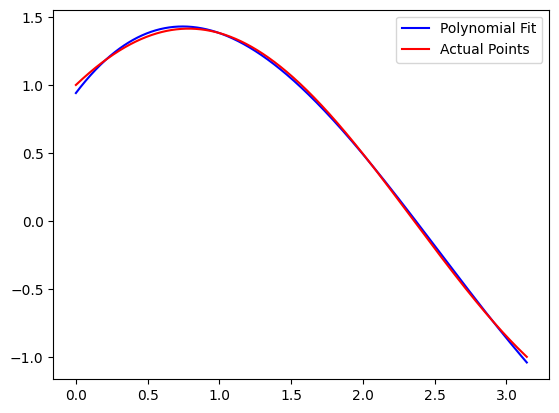

In [ ]:
#Q2
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff
    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val
    def bestfitpolyq2(self,deg):
      A=[[0 for i in range(deg+1)] for j in range(deg+1)]
      B=[0 for i in range(deg+1)]
      for i in range(deg+1):
        for j in range(deg+1):
          A[i][j]=integrate.romberg(lambda x: x**(i+j),0,math.pi)
        B[i]=integrate.romberg(lambda x: x**i*(math.sin(x)+math.cos(x)) ,0,math.pi)
      x=np.linalg.solve(A,B)
      p=Polynomial(x)
      x_points=np.linspace(0,math.pi,1200)
      y_pointsactual=[]
      y_pointspred=[]
      for x in x_points:
        y_pointsactual.append(math.sin(x)+math.cos(x))
        y_pointspred.append(p[x])
      plt.plot(x_points,y_pointspred,label="Polynomial Fit",color="blue")
      plt.plot(x_points,y_pointsactual,label="Actual Points",color="red")
      plt.legend()
      plt.show()

# p1=Polynomial([0])
# p1.bestfitpolyq2(3)

In [ ]:
#Q3
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff

    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val

    def __str__(self):
      return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

    def diff(self):
      newp=[]
      for i in range(1,len(self.coeff)):
        newp.append(i*self.coeff[i])
      return Polynomial(newp)

    def __rmul__(self,other):
      #for 2*object
      k=Polynomial([other*i for i in self.coeff])
      return k

    def __mul__(self,other):
      #for object*2
      if isinstance(other,(int,float)):
        k=Polynomial([other*i for i in self.coeff])
        return k
      else:
        l1=len(self.coeff)
        l2=len(other.coeff)
        k=Polynomial([0]*(l1+l2-1))
        for i in range(0,l1):
          for j in range(0,l2):
            k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
        return k

    def legendrepoly(self,n):
      p=Polynomial([1])
      for i in range(n):
        p*=Polynomial([-1,0,1])
      for i in range(n):
        p=p.diff()
      newp=p*(1/((2**n)*math.factorial(n)))
      return newp


# p1=Polynomial([0])
# print(p1.legendrepoly(2))

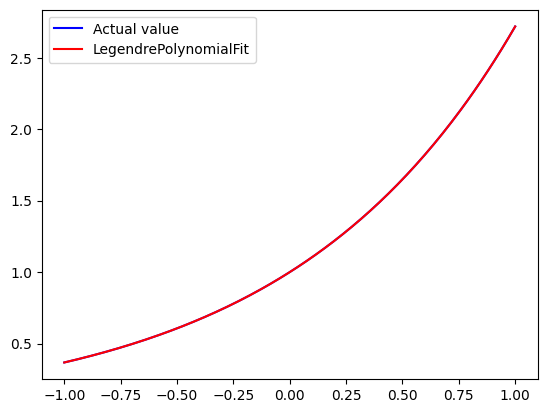

None


In [ ]:
#Q4
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff

    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val

    def __str__(self):
      return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

    def __add__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i+j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def diff(self):
      newp=[]
      for i in range(1,len(self.coeff)):
        newp.append(i*self.coeff[i])
      return Polynomial(newp)

    def __rmul__(self,other):
      #for 2*object
      k=Polynomial([other*i for i in self.coeff])
      return k

    def __mul__(self,other):
      #for object*2
      if isinstance(other,(int,float)):
        k=Polynomial([other*i for i in self.coeff])
        return k
      else:
        l1=len(self.coeff)
        l2=len(other.coeff)
        k=Polynomial([0]*(l1+l2-1))
        for i in range(0,l1):
          for j in range(0,l2):
            k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
        return k

    def legendrepoly(self,n):
      p=Polynomial([1])
      for i in range(n):
        p*=Polynomial([-1,0,1])
      for i in range(n):
        p=p.diff()
      newp=p*(1/((2**n)*math.factorial(n)))
      return newp

    def legendrepolyfit(self,n):
      def f1(x):
        #find value of legendre polynomial at x
        return Polynomial([0]).legendrepoly(i)[x]*math.exp(x)
      def f2(x):
        #find value of legendre polynomial at x
        return (Polynomial([0]).legendrepoly(i)[x])*(Polynomial([0]).legendrepoly(i)[x])
      a=[]
      for i in range(n):
        a.append(integrate.romberg(f1,-1,1)/integrate.romberg(f2,-1,1))
      newp=Polynomial([0])
      for i in range(n):
        newp+=a[i]*(Polynomial([0]).legendrepoly(i))
      xaxis=np.linspace(-1,1,200)
      yaxisactual=[math.exp(i) for i in xaxis]
      yaxispred=[newp[i] for i in xaxis]
      plt.plot(xaxis,yaxisactual,label="Actual value",color="blue")
      plt.plot(xaxis,yaxispred,label="LegendrePolynomialFit",color="red")
      plt.legend()
      plt.show()


p1=Polynomial([0])
print(p1.legendrepolyfit(10))

In [ ]:
#Q5
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff

    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val

    def __str__(self):
      return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

    def __sub__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i-j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def __add__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i+j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def diff(self):
      newp=[]
      for i in range(1,len(self.coeff)):
        newp.append(i*self.coeff[i])
      return Polynomial(newp)

    def __rmul__(self,other):
      #for 2*object
      k=Polynomial([other*i for i in self.coeff])
      return k

    def __mul__(self,other):
      #for object*2
      if isinstance(other,(int,float)):
        k=Polynomial([other*i for i in self.coeff])
        return k
      else:
        l1=len(self.coeff)
        l2=len(other.coeff)
        k=Polynomial([0]*(l1+l2-1))
        for i in range(0,l1):
          for j in range(0,l2):
            k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
        return k

    def chebyshev(self,n):
      if n==0:
        return Polynomial([1])
      elif n==1:
        return Polynomial([0,1])
      else:
        return 2*Polynomial([0,1])*self.chebyshev(n-1)-self.chebyshev(n-2)

p1=Polynomial([0])
print(p1.chebyshev(2))

Coefficients of the polynomial are:
-1 0 2


In [ ]:
#Q6
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff

    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val

    def __str__(self):
      return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

    def __sub__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i-j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def __add__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i+j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def diff(self):
      newp=[]
      for i in range(1,len(self.coeff)):
        newp.append(i*self.coeff[i])
      return Polynomial(newp)

    def __rmul__(self,other):
      #for 2*object
      k=Polynomial([other*i for i in self.coeff])
      return k

    def __mul__(self,other):
      #for object*2
      if isinstance(other,(int,float)):
        k=Polynomial([other*i for i in self.coeff])
        return k
      else:
        l1=len(self.coeff)
        l2=len(other.coeff)
        k=Polynomial([0]*(l1+l2-1))
        for i in range(0,l1):
          for j in range(0,l2):
            k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
        return k

    def chebyshev(self,n):
      if n==0:
        return Polynomial([1])
      elif n==1:
        return Polynomial([0,1])
      else:
        return 2*Polynomial([0,1])*self.chebyshev(n-1)-self.chebyshev(n-2)

    def Orthogonal_Check(self):
        def f(x,i,j):
          return self.chebyshev(i)[x] * self.chebyshev(j)[x] / math.sqrt(1 - x ** 2)

        flag = 0
        for i in range(5):
            for j in range(5):
              #abs(round()) otherwise negative value
              value = abs(round(integrate.quad(f, -1, 1,args=(i,j))[0],8))
              if value != 0 and i!=j:
                  flag = 1
        if flag == 0:
            return "Orthogonal"
        else:
            return "Not orthogonal"


p1=Polynomial([0])
p1.Orthogonal_Check()

'Orthogonal'

Co-efficients a are:  [7.352155820749955, -3.6760779103749774, 1.4704311641499912, -0.7352155820749962, 0.43247975416176204, -0.28277522387499693]
Co-efficients b are:  [0.0, 3.6760779103749774, -2.9408623282999815, 2.2056467462249865, -1.7299190166470477, 1.413876119374991]


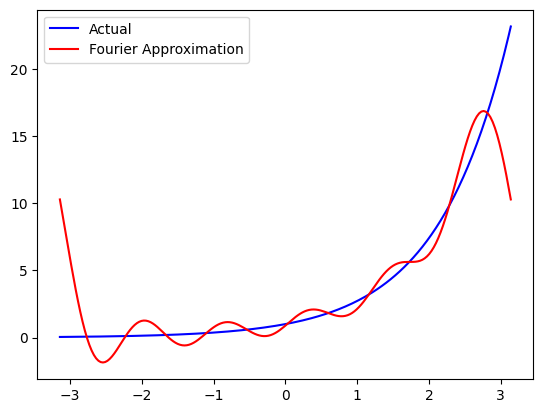

In [ ]:
#Q7
class Polynomial():
    def __init__(self,coeff):
      self.coeff=coeff

    def __getitem__(self,ind):
      val=0
      for i in range(len(self.coeff)):
        val+=(self.coeff[i]*(ind**i))
      return val

    def __str__(self):
      return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

    def __sub__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i-j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def __add__(self,other):
      if len(self.coeff)<len(other.coeff):
        self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
      elif len(other.coeff)<len(self.coeff):
        other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
      r3=Polynomial([i+j for i,j in zip(self.coeff,other.coeff)])
      return r3

    def diff(self):
      newp=[]
      for i in range(1,len(self.coeff)):
        newp.append(i*self.coeff[i])
      return Polynomial(newp)

    def __rmul__(self,other):
      #for 2*object
      k=Polynomial([other*i for i in self.coeff])
      return k

    def __mul__(self,other):
      #for object*2
      if isinstance(other,(int,float)):
        k=Polynomial([other*i for i in self.coeff])
        return k
      else:
        l1=len(self.coeff)
        l2=len(other.coeff)
        k=Polynomial([0]*(l1+l2-1))
        for i in range(0,l1):
          for j in range(0,l2):
            k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
        return k

    def fourierseries(self,n):
      a=[]
      b=[]
      def f1(x,k):
        return math.exp(x)*math.cos(k*x)

      def f2(x,k):
        return math.exp(x)*math.sin(k*x)

      for i in range(n+1):
        a.append(integrate.quad(f1,-math.pi,math.pi,args=i)[0]/math.pi)
        b.append(integrate.quad(f2,-math.pi,math.pi,args=i)[0]/math.pi)
      print("Co-efficients a are: ",a)
      print("Co-efficients b are: ",b)

      def Sn(x):
        asum=0
        bsum=0
        for i in range(1,n+1):
          asum+=a[i]*math.cos(i*x)
          bsum+=b[i]*math.sin(i*x)
        return asum+bsum+a[0]/2

      xaxis=np.linspace(-math.pi,math.pi,200)
      yactual=[math.exp(i) for i in xaxis]
      ypred=[Sn(i) for i in xaxis]
      plt.plot(xaxis,yactual,color="blue",label="Actual")
      plt.plot(xaxis,ypred,color="red",label="Fourier Approximation")
      plt.legend()
      plt.show()


p1=Polynomial([0])
p1.fourierseries(5)

In [ ]:
#Q8
from scipy.fft import fft, ifft
import math


def Approx_Product(n,m):
    """
     find Approx Product of two large numbers in nlogn
    """
    #Needs a large array so padding with zeros
    total_digits=len(str(n))+len(str(m))
    digits_n=[]
    digits_m= []
    for _ in range(total_digits):
      digits_n.append(n%10)
      n=n//10
      digits_m.append(m%10)
      m=m//10

    # Apply FFTs for converting time domain data to frequency domain data in form (Amplitude and phrase )
    #e^(iwt)=cos(wt)+isin(wt) w=frequency and t in time

    #fft requires the array in reverse order
    fft_n = fft(digits_n)
    fft_m = fft(digits_m)

    # Multiplcation of the FFTs is much faster
    prod = fft_n * fft_m

    #Inverse FFT to get back to time domain data after multiplication
    prod = ifft(prod)

    #output is given in reverse order or re reverse it and compute the number
    prod=prod[::-1]
    # Computing  final product
    result = 0
    for num in prod:
        result =result*10+num.real
    result=int(result)
    print("Computed Product using fft: ",result)


# n=int(input("Enter first Number :  "))
# m=int(input("Enter Second Number : "))
n=83
m=82
Approx_Product(n,m)
print("Actual Product: ",n*m)

Computed Product using fft:  6806
Actual Product:  6806
